# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
Number_of_cities = len(cities)
Number_of_cities

563

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
#city_results = []
#Index_cities=[]

City_Number = []
City_Name = []
City_Lat = []
City_Lng = []
City_MaxTemp = []
City_Humidity = []
City_Cloudiness = []
City_WindSpeed = []
City_Country = []
City_Date = []
Count_Record = 0
  
#city_ejempo=['London','Melbourne','Alaska','Jazan','Caracas','Harare','El Junquito','New Orleans',"GTY77","Maracay","Washington", "Pensilvanya", "Palita", "guarenas", "Atlanta", "Bogota"]

for city in cities:    # cities[:100]: to just do it for 100 rows (City) test
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #print(url) 
    Req_weather_city = requests.get(url).json()
    if (Req_weather_city["cod"]==200):
        Count_Record = Count_Record + 1
        City_Number.append(Req_weather_city['id'])
        City_Name.append(Req_weather_city['name'])
        City_Lat.append(Req_weather_city['coord']['lat'])
        City_Lng.append(Req_weather_city['coord']['lon'])
        City_MaxTemp.append(Req_weather_city['main']['temp'])
        City_Humidity.append(Req_weather_city['main']['humidity'])
        City_Cloudiness.append(Req_weather_city['clouds']['all'])
        City_WindSpeed.append(Req_weather_city['wind']['speed'])
        City_Country.append(Req_weather_city['sys']['country'])
        City_Date.append(Req_weather_city['dt'])
        print(f"Processing Record {Count_Record} of {Number_of_cities} |City number: {Req_weather_city['id']}, City name: {Req_weather_city['name']}")
    else: 
        #{"cod":"404","message":"city not found"}
        print(f"{city}: {Req_weather_city['message']}. Skipping...")

weather_dict = {
    "City": City_Name,
    "Lat": City_Lat,
    "Lng":City_Lng,
    "Temp": City_MaxTemp,
    "Humidity":City_Humidity,
    "Cloudiness":City_Cloudiness,
    "Wind Speed":City_WindSpeed,
    "Country":City_Country,
    "Date":City_Date 
}
meteorology_cities = pd.DataFrame(weather_dict)


grand river south east: city not found. Skipping...
Processing Record 1 of 563 |City number: 4030556, City name: Rikitea
Processing Record 2 of 563 |City number: 2022572, City name: Khatanga
illoqqortoormiut: city not found. Skipping...
Processing Record 3 of 563 |City number: 1714733, City name: Dingle
Processing Record 4 of 563 |City number: 4032243, City name: Vaini
Processing Record 5 of 563 |City number: 935215, City name: Saint-Philippe
Processing Record 6 of 563 |City number: 1643078, City name: Indramayu
Processing Record 7 of 563 |City number: 1651810, City name: Airai
Processing Record 8 of 563 |City number: 2152659, City name: Port Macquarie
Processing Record 9 of 563 |City number: 3833367, City name: Ushuaia
Processing Record 10 of 563 |City number: 2075265, City name: Busselton
Processing Record 11 of 563 |City number: 3471451, City name: Arraial do Cabo
Processing Record 12 of 563 |City number: 2163355, City name: Hobart
Processing Record 13 of 563 |City number: 4020109, 

Processing Record 110 of 563 |City number: 3456820, City name: Monte Santo
saleaula: city not found. Skipping...
Processing Record 111 of 563 |City number: 5369690, City name: Magalia
Processing Record 112 of 563 |City number: 1849831, City name: Toyooka
Processing Record 113 of 563 |City number: 3831208, City name: Qaanaaq
Processing Record 114 of 563 |City number: 487928, City name: Novikovo
Processing Record 115 of 563 |City number: 3421765, City name: Nanortalik
Processing Record 116 of 563 |City number: 2090021, City name: Namatanai
Processing Record 117 of 563 |City number: 3686907, City name: Cerrito
Processing Record 118 of 563 |City number: 2155415, City name: New Norfolk
mys shmidta: city not found. Skipping...
Processing Record 119 of 563 |City number: 1529195, City name: Shihezi
Processing Record 120 of 563 |City number: 520552, City name: Nizhniy Odes
Processing Record 121 of 563 |City number: 2112802, City name: Hasaki
Processing Record 122 of 563 |City number: 3691094, C

Processing Record 220 of 563 |City number: 2126199, City name: Cherskiy
Processing Record 221 of 563 |City number: 918702, City name: Chipata
Processing Record 222 of 563 |City number: 1277909, City name: Bāgepalli
Processing Record 223 of 563 |City number: 2270385, City name: Camacha
Processing Record 224 of 563 |City number: 2450173, City name: Taoudenni
Processing Record 225 of 563 |City number: 491019, City name: Sol'-Iletsk
kegayli: city not found. Skipping...
Processing Record 226 of 563 |City number: 3628473, City name: San Cristobal
Processing Record 227 of 563 |City number: 2980080, City name: Saint-François
Processing Record 228 of 563 |City number: 2121025, City name: Srednekolymsk
Processing Record 229 of 563 |City number: 5563839, City name: Fortuna
Processing Record 230 of 563 |City number: 2082539, City name: Merauke
karaul: city not found. Skipping...
Processing Record 231 of 563 |City number: 3397967, City name: Itaituba
Processing Record 232 of 563 |City number: 15160

Processing Record 327 of 563 |City number: 1140025, City name: Herat Province
Processing Record 328 of 563 |City number: 1058080, City name: Nosy Varika
Processing Record 329 of 563 |City number: 6100799, City name: Pemberton
Processing Record 330 of 563 |City number: 3464724, City name: Diamantino
Processing Record 331 of 563 |City number: 5919850, City name: Chapais
Processing Record 332 of 563 |City number: 2629833, City name: Husavik
Processing Record 333 of 563 |City number: 189280, City name: Lodwar
Processing Record 334 of 563 |City number: 6126749, City name: Rocky Mountain House
Processing Record 335 of 563 |City number: 1519275, City name: Shar
Processing Record 336 of 563 |City number: 4031574, City name: Provideniya
Processing Record 337 of 563 |City number: 1586443, City name: Ca Mau
fevralsk: city not found. Skipping...
Processing Record 338 of 563 |City number: 1684803, City name: Tabuk
Processing Record 339 of 563 |City number: 3354071, City name: Oranjemund
tsienyane: 

Processing Record 434 of 563 |City number: 2984701, City name: Quimper
Processing Record 435 of 563 |City number: 1799869, City name: Nanning
Processing Record 436 of 563 |City number: 4552707, City name: Tahlequah
Processing Record 437 of 563 |City number: 1701054, City name: Marawi
Processing Record 438 of 563 |City number: 2137748, City name: Voh
Processing Record 439 of 563 |City number: 964406, City name: Port Shepstone
tingrela: city not found. Skipping...
Processing Record 440 of 563 |City number: 3151719, City name: Hov
Processing Record 441 of 563 |City number: 4794814, City name: Wyndham
Processing Record 442 of 563 |City number: 5380437, City name: Pacific Grove
galgani: city not found. Skipping...
Processing Record 443 of 563 |City number: 2019935, City name: Mnogovershinnyy
Processing Record 444 of 563 |City number: 4845585, City name: Westport
Processing Record 445 of 563 |City number: 1651531, City name: Ambon City
Processing Record 446 of 563 |City number: 100926, City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display the DataFrame
for date_ in meteorology_cities['Date']:
    meteorology_cities['Date'] = datetime.fromtimestamp(date_).strftime('%m/%d/%Y')
# Export the city data into a .csv.
meteorology_cities.to_csv("output_data/meteorology_of_cities.csv", index=False, header=True)
meteorology_cities

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.63,71,47,12.50,PF,02/07/2021
1,Khatanga,71.9667,102.5000,-28.08,79,12,11.50,RU,02/07/2021
2,Dingle,10.9995,122.6711,76.05,92,100,11.32,PH,02/07/2021
3,Vaini,-21.2000,-175.2000,77.00,100,90,12.66,TO,02/07/2021
4,Saint-Philippe,-21.3585,55.7679,74.39,61,90,6.91,RE,02/07/2021
...,...,...,...,...,...,...,...,...,...
515,College,64.8569,-147.8028,-16.76,76,20,2.84,US,02/07/2021
516,Bonavista,48.6499,-53.1147,26.85,74,3,13.80,CA,02/07/2021
517,San Julián,21.0167,-102.1667,66.09,27,31,9.24,MX,02/07/2021
518,Tilichiki,60.4667,166.1000,17.53,94,100,12.80,RU,02/07/2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
Weather_cities_statistic = meteorology_cities.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
Weather_cities_statistic

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,19.266985,18.919825,49.076904,73.944231,51.688462,8.185135
std,32.638741,90.706242,32.161922,18.211526,40.820051,6.012651
min,-54.800000,-175.200000,-43.600000,1.000000,0.000000,0.290000
25%,-6.908575,-60.219050,29.685000,66.750000,1.000000,3.705000
50%,21.181800,20.333900,60.495000,78.000000,48.500000,6.910000
75%,47.456550,102.263925,75.142500,86.000000,96.250000,11.500000
max,78.218600,179.316700,91.400000,100.000000,100.000000,43.730000


In [6]:
#  Get the indices of cities that have humidity over 100%
#city_Hum100 =  meteorology_cities.index[meteorology_cities['Humidity'] > 100 ].tolist()
city_Hum100 = meteorology_cities[(meteorology_cities['Humidity'] > 100)]
if len(city_Hum100) == 0:
    clean_city_data = meteorology_cities.copy()
    print(f"Skip this step if there are no cities that have humidity > 100%.")
    print(city_Hum100.index)
else:
    clean_city_data = meteorology_cities[(meteorology_cities['Humidity'] <= 100)]
    clean_city_data_statistic = clean_city_data.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
    print(f"Indices of cities that have humidity over 100%.: {city_Hum100.index}")
    print(f"=========================================================================")
    print(f"{clean_city_data_statistic}")

Skip this step if there are no cities that have humidity > 100%.
Int64Index([], dtype='int64')


In [7]:
#which we call "clean_city_data"
clean_city_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.63,71,47,12.50,PF,02/07/2021
1,Khatanga,71.9667,102.5000,-28.08,79,12,11.50,RU,02/07/2021
2,Dingle,10.9995,122.6711,76.05,92,100,11.32,PH,02/07/2021
3,Vaini,-21.2000,-175.2000,77.00,100,90,12.66,TO,02/07/2021
4,Saint-Philippe,-21.3585,55.7679,74.39,61,90,6.91,RE,02/07/2021
...,...,...,...,...,...,...,...,...,...
515,College,64.8569,-147.8028,-16.76,76,20,2.84,US,02/07/2021
516,Bonavista,48.6499,-53.1147,26.85,74,3,13.80,CA,02/07/2021
517,San Julián,21.0167,-102.1667,66.09,27,31,9.24,MX,02/07/2021
518,Tilichiki,60.4667,166.1000,17.53,94,100,12.80,RU,02/07/2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

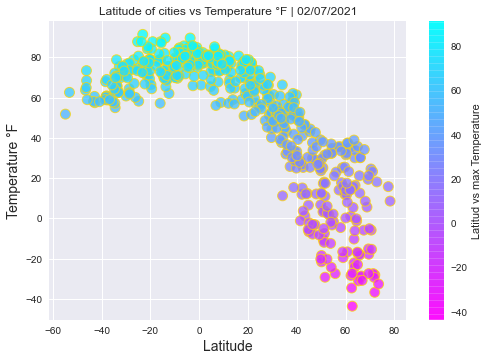

In [8]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Temp']
ratio = clean_city_data['Temp'] #[1, 0.53, 2, 0.76, 0.5, 2.125, 0.56, 1.28, 1.09, 1.02]
plt.scatter(x, y, s=100, c=ratio, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75)
plt.title(f"Latitude of cities vs Temperature °F | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Temperature °F", fontsize="14")
cbar = plt.colorbar()
cbar.set_label('Latitud vs max Temperature')
plt.savefig("output_data/Fig1_Lat_vs_Tem.png")

## Latitude vs. Humidity Plot

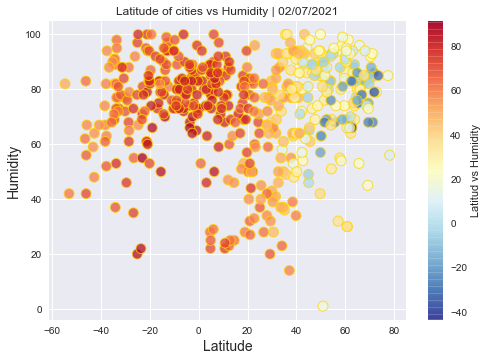

In [9]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
plt.scatter(x, y, s=100, c=ratio, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75)
plt.title(f"Latitude of cities vs Humidity | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Humidity", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Humidity')
plt.savefig("output_data/Fig2_Lat_vs_Hum.png")

## Latitude vs. Cloudiness Plot

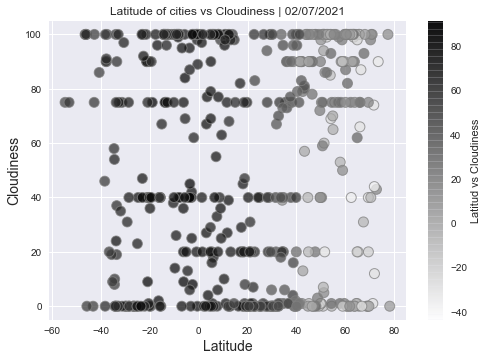

In [10]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
plt.scatter(x, y, s=100, c=ratio, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Cloudiness | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Cloudiness", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Cloudiness')
plt.savefig("output_data/Fig3_Lat_vs_Clou.png")

## Latitude vs. Wind Speed Plot

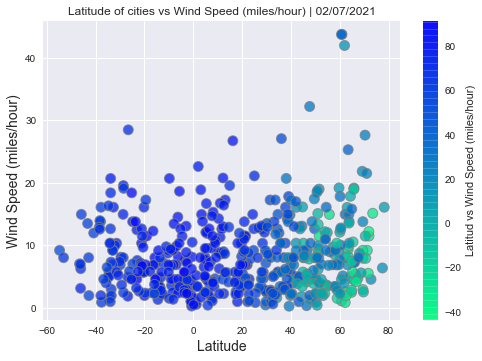

In [11]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']
plt.scatter(x, y, s=100, c=ratio, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Wind Speed (miles/hour) | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Wind Speed (miles/hour)", fontsize="14")
cbar = plt.colorbar()
cbar.set_label(f"Latitud vs Wind Speed (miles/hour)")
plt.savefig("output_data/Fig4_Lat_vs_WS.png")


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

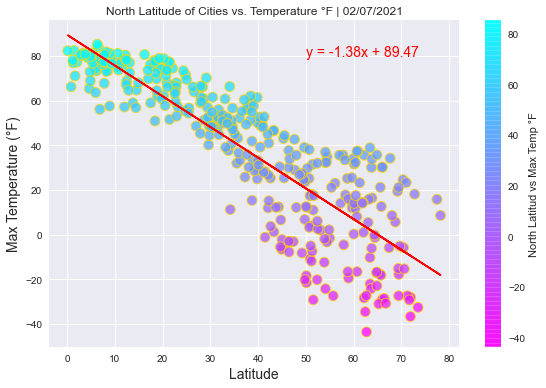

the intercept :89.466
correlation:-0.861
Lat linear regression model :y = -1.38x + 89.47
 I observe that both variables have a very high inverse (negative) correlation based on the value: -0.861, that is -86.1%, which indicates that are inversely proportional, as long as the Latitude decreases, approaches 0° (Equator), the Temeprature °F increases in the same proportion.


In [12]:
# Northern Hemisphere = Latitude between 0 ° and 90 °: Northern Hemisphere
Northern_city_data = meteorology_cities[(meteorology_cities['Lat'] > 0)]
date = Northern_city_data['Date'].max()
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Temp']
ratio_Northern = Northern_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,80),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Temperature °F | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Max Temperature (°F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Max Temp °F')
plt.savefig("output_data/Fig5_North_Lat_vs_temp_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"===============================================")
print(f" I observe that both variables have a very high inverse (negative) correlation \
based on the value: {correlation_North}, that is {round(correlation_North*100,2)}%, which \
indicates that are inversely proportional, as long as the Latitude \
decreases, approaches 0° (Equator), the Temeprature °F increases in the same proportion.")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

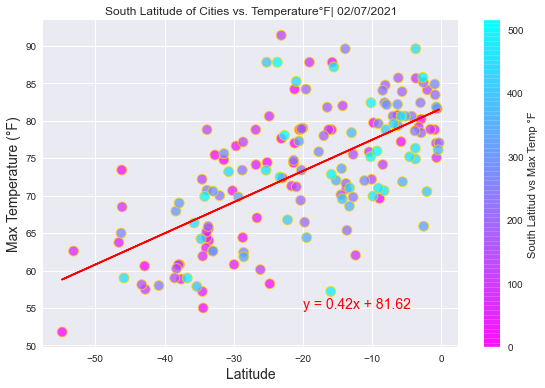

the intercept :81.617
correlation:0.65
Lat linear regression model :y = 0.42x + 81.62
There is a very high correlation based on the value 0.65, that is: 65.0%, which indicates that they are directly proportional, while the Latitude increases, Lat approaches zero (Equator), the Temeprature °F also increases, in the same proportion.


In [13]:
# Southern Hemisphere = Latitude between 0 ° and -90 °: Southern Hemisphere
Southern_city_data = meteorology_cities[(meteorology_cities['Lat'] < 0)]
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Temp']
ratio_Southern = Southern_city_data['Temp'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,55),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Temperature°F| {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Max Temperature (°F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Max Temp °F')
plt.savefig("output_data/Fig6_South_Lat_vs_temp_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is a very high correlation based on the value {correlation_South}, that is: {round(correlation_South*100,2)}%, which \
indicates that they are directly proportional, while the Latitude increases, Lat approaches zero (Equator), \
the Temeprature °F also increases, in the same proportion.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

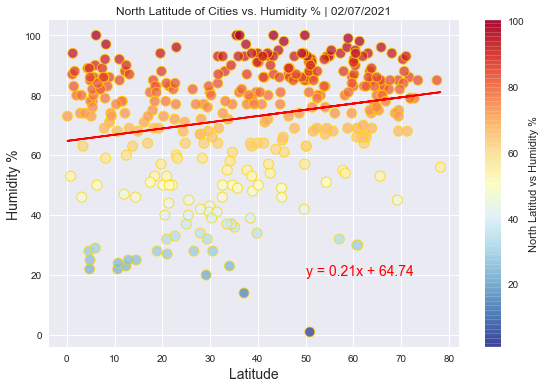

the intercept :64.74
correlation:0.219
Lat linear regression model :y = 0.21x + 64.74
There is an absence of correlation between Northern Hemisphere Latitude and Humidity %, the correlation value is 21.9%, although it is positive, it does not show a trend between both variables


In [14]:
# Northern Hemisphere = Latitude between 0 ° and 90 °: Northern Hemisphere
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#Northern_city_data = meteorology_cities[(meteorology_cities['Lat'] > 0)]
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Humidity']
ratio_Northern = Northern_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Humidity % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Humidity %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Humidity %')
plt.savefig("output_data/Fig7_North_Lat_vs_Hum_reg.png") 
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"=============================================")
print(f"There is an absence of correlation between Northern Hemisphere Latitude and Humidity %, \
the correlation value is {round(correlation_North*100,2)}%, although it is positive, it does not show a trend between both variables")
  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

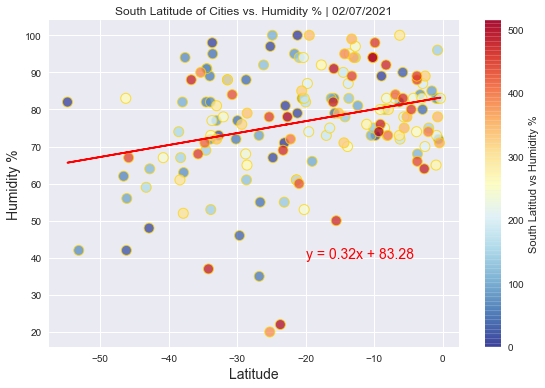

the intercept :83.284
correlation:0.3
Lat linear regression model :y = 0.32x + 83.28
There is an absence of correlation between Southern Hemisphere Latitude and Humidity %, the correlation value is 30.0%, although it is positive, it does not show a trend between both variables


In [15]:
Southern_city_data = meteorology_cities[(meteorology_cities['Lat'] < 0)]
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Humidity']
ratio_Southern = Southern_city_data['Humidity'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,40),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Humidity % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Humidity %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Humidity %')
plt.savefig("output_data/Fig8_South_Lat_vs_Hum_reg.png") 
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is an absence of correlation between Southern Hemisphere Latitude and Humidity %, \
the correlation value is {round(correlation_South*100,2)}%, although it is positive, it does not show a trend between both variables")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

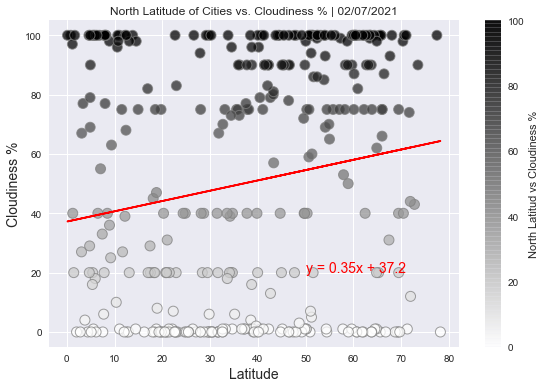

the intercept :37.2
correlation:0.173
Lat linear regression model :y = 0.35x + 37.2
There is an absence of correlation (no correlation) between Latitude and Cloudiness %, the correlation value is 17.3%, although it is positive


In [16]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Cloudiness']
ratio_Northern = Northern_city_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Cloudiness % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Cloudiness %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Cloudiness %')
plt.savefig("output_data/Fig9_North_Lat_vs_Clo_reg.png") 
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"==============================================")
print(f"There is an absence of correlation (no correlation) between Latitude and Cloudiness %, \
the correlation value is {round(correlation_North*100,2)}%, although it is positive")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

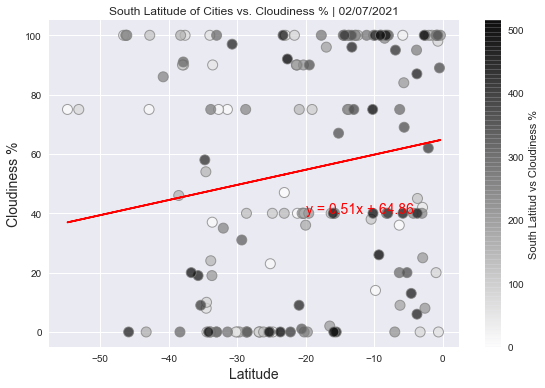

the intercept :64.865
correlation:0.17
Lat linear regression model :y = 0.51x + 64.86
There is no correlation between Latitude and Cloudiness %, the correlation value is 17.0%, although it is positive


In [17]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Cloudiness']
ratio_Southern = Southern_city_data['Cloudiness'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,40),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Cloudiness % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Cloudiness %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Cloudiness %')
plt.savefig("output_data/Fig10_South_Lat_vs_Clo_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is no correlation between Latitude and Cloudiness %, \
the correlation value is {round(correlation_South*100,2)}%, although it is positive")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

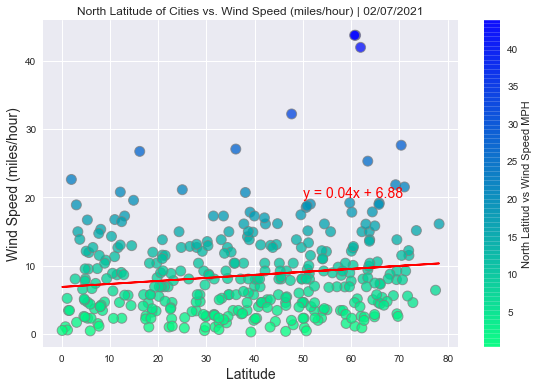

the intercept :6.88
correlation:0.141
Lat linear regression model :y = 0.04x + 6.88
There is a low correlation between latitude and wind speed, the correlation value is 14.1%, although it is positive Looking at the graph and the agglomeration of the points, it seems that there is a marked correlation, but analyzing the regression line, this correlation is low, denoting that if the latitude separates from the equator, the wind is moderately rising.


In [18]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Wind Speed']
ratio_Northern = Northern_city_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Wind Speed (miles/hour) | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Wind Speed (miles/hour)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Wind Speed MPH')
plt.savefig("output_data/Fig11_North_Lat_vs_WS_reg.png")
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"==============================================")
print(f"There is a low correlation between latitude and wind speed, \
the correlation value is {round(correlation_North*100,2)}%, although it is positive \
Looking at the graph and the agglomeration of the points, it seems that there is a marked \
correlation, but analyzing the regression line, this correlation is low, \
denoting that if the latitude separates from the equator, the wind is moderately rising.")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

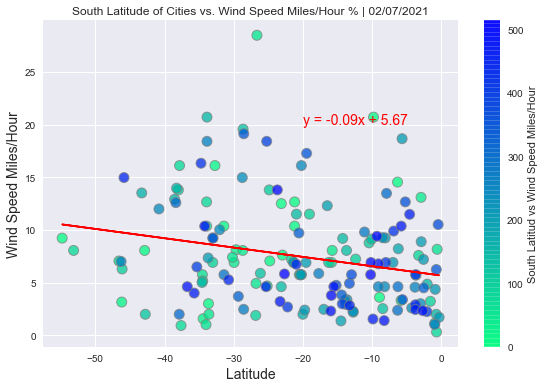

the intercept :5.667
correlation:-0.24
Lat linear regression model :y = -0.09x + 5.67
There is a low correlation between latitude and wind speed, the correlation value is -24.0%, is negative, the low correlation suggests that as you approach zero latitude, the equator, the wind speed decreases very slowly.


In [19]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Wind Speed']
ratio_Southern = Southern_city_data['Wind Speed'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,20),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Wind Speed Miles/Hour % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Wind Speed Miles/Hour", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Wind Speed Miles/Hour')
plt.savefig("output_data/Fig12_South_Lat_vs_WS_reg.png")
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is a low correlation between latitude and wind speed, \
the correlation value is {round(correlation_South*100,2)}%, is negative, \
the low correlation suggests that as you approach zero latitude, the equator, \
the wind speed decreases very slowly.")
 